In [153]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import CCXGate, CXGate
from numpy import matmul, kron, sqrt
from numpy.linalg import norm
%matplotlib inline

# Teleportation

### Alice and Bob
We will use Alice and Bob as names for agents in systems that involve the exchange of information. 
* Imagine them in different locations
* with different roles, sometimes cooperate or compete

### Entanglement
Recall the entagled state
$$
\ket{\phi^+} = \frac{1}{\sqrt{2}}\ket{00} + \frac{1}{\sqrt{2}}\ket{11}
$$
It is considered the archetypal example of an entangled quantum state. It is analogous to a probabilistic state
$$
\ket{a} = \frac{1}{2}\ket{00} + \frac{1}{2}\ket{11}
$$
but this probabilistic state is not entangled. 

*Entanglement* refers to any **non-classical** quantum correlation.

We can describe $\ket{\phi^+}$ as one *unit* of entanglement which we weill refer to as an *e-bit*. So while it may represent 2 bits the quantity of entanglement is 1.

Next we will look at what entanglement allows us to do that probabilistic states do not.

When we say Alice and Bob share an *e-bit* we mean Alice has qubit A and Bob has Qubit B and together the pair is in the state $\ket{\phi^+}$.

### Teleportation
Is a protocol where a sender (Alice) transmits a qubit to a receiver (Bob) by making use of a shared entangled quantum state along with two bits of classical communication.

##### The Setup
Alice has a qubit Q that she wishes to transmit to Bob. 
* She is unable to physically send Q to Bob - she can only send *classical information*
* Alice and Bob *share and e-bit* as Qubits A and B
* Note this is not possible to do without having an *e-bit*
* The state of Q is unknown to Alice and Bob
* Correlations between Q and other systems must be preserved by the transmission
* The *no-cloning theorem* implies that if Bob receives the transmission, Alice must no longer have the qubit in its original state.

##### The teleportation Protocol.
![title](TeleportationImages/teleportation.png)

The protocol is 
1. Alice performs a controlled-Not on the pair (A, Q) with Q as the control
2. Alice then measures both A (as a) and Q (as b) with respect to a standard basis measurement and transmits the classical outcomes to Bob
3. Bob receives a and b from Alice and does the following
    - if $a = 1$ then Bob performs a bit flip (or X gate) on his qubit B
    - if $b = 1$ then Bob performs a phase flip (or Z gate) on his qubit B
    - That is, conditioned on ab being 00, 01, 10, 11, Bob does I, Z, X, or ZX on B

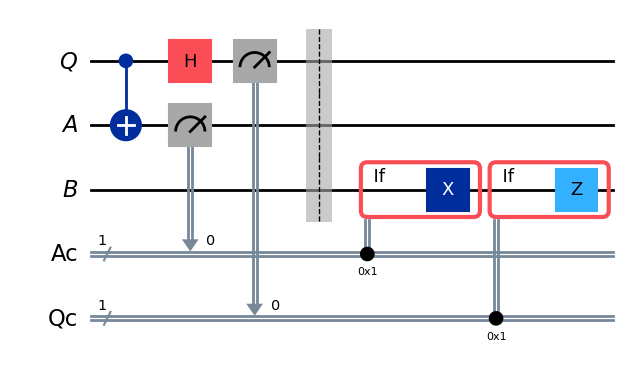

In [25]:
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
Q = QuantumRegister(1, "Q")
Qc = ClassicalRegister(1, "Qc")
Ac = ClassicalRegister(1, "Ac")
c = QuantumCircuit(Q, A, B, Ac, Qc)

# Alices Operations
c.cx(Q, A)
c.h(Q)

# Measure
c.measure(Q, Qc)
c.measure(A, Ac)
c.barrier()

# Bobs operations
with c.if_test((Ac, 1)):
    c.x(B)
with c.if_test((Qc, 1)):
    c.z(B)
display(c.draw("mpl"))

### Analysis
So initially we have (AB) in $\ket{\phi^+}$ where Alice as A and Bob has B. Alice also has a qubit Q in some state $\ket{\psi}$. She wants to transfer to Bob, but she has to do so through classical registers.

Steps
1. Alice performs a controlled-Not where Q is the control and A is the target
2. Alice performs a hadamard on Q
3. Alice measures A and Q on standard basis measurements as a and b respectively
4. Alice sends a and b to Bob
5. Bob performs two steps
    * if a = 1 then Bob applies and X oepration to B
    * if b = 1 then Bob applies a Z operation to the qubit B

Lets assume $Q = \alpha\ket{0} + \beta\ket{1}$ where $\alpha$ and $\beta$ make $Q$ a QSV. Then the state of all 3 qubits is described
$$
\ket{\pi_0} = \ket{\phi^+}\otimes (\alpha\ket{0} + \beta\ket{1}) \\
= \frac{\alpha\ket{000} + \alpha\ket{110} + \beta\ket{001} + \beta\ket{111}}{\sqrt{2}}
$$
Then we perform a control-Not gate which gives us 
$$
\ket{\pi_1} 
= \frac{\alpha\ket{000} + \alpha\ket{110} + \beta\ket{011} + \beta\ket{101}}{\sqrt{2}}
$$
We we do a hadamard gate which turns $\ket{\pi_1}$ into 
$$
\ket{\pi_2} = \frac{\alpha\ket{00}\ket{+} + \alpha\ket{11}\ket{+} + \beta\ket{01}\ket{-} + \beta\ket{10}\ket{-}}{\sqrt{2}} \\
= \frac{
    \alpha\ket{000} + \alpha\ket{001} + \alpha\ket{110} + \alpha\ket{111}
    \beta\ket{010} - \beta\ket{011}  + \beta\ket{100} - \beta\ket{101} 
}
{2}
$$
Using the multilinearity of the tensor product we get
$$
\ket{\pi_2} =
\frac{1}{2} (\alpha\ket{0} + \beta\ket{1})\ket{00} \\
+ \frac{1}{2} (\alpha\ket{0} - \beta\ket{1})\ket{01} \\
+ \frac{1}{2} (\alpha\ket{0} + \beta\ket{1})\ket{10} \\
+ \frac{1}{2} (\alpha\ket{0} - \beta\ket{1})\ket{11} \\
$$
This is useful because it appears the leftmost qubit $B$ now depends on $\alpha$ and $\beta$, even though there has been no communication from Alice to Bob. 

In [147]:
AB = Statevector([1/sqrt(2), 0, 0, 1/sqrt(2)])
alpha = 1/sqrt(2)
beta = 1j/sqrt(2)
Q = Statevector([alpha, beta])
ket_pi0 = AB.tensor(Q)
display(ket_pi0.draw("latex"))

ccx = CXGate().to_matrix()
I = Operator.from_label("I")
ket_pi1 = ket_pi0.evolve(I ^ ccx)
display(ket_pi1.draw("latex"))

ket_pi2 = ket_pi1.evolve(I ^ I ^ Operator.from_label("H"))
display(ket_pi2.draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now lets consider the possible outcome of Alices's measurement. 
We know 
$$
P(ab = a'b') =  ||\braket{0a'b'|\pi_2} + \braket{1a'b'|\pi_2}||^2
$$
Then given our formulation of $\ket{\pi_2}$ above we can see that for any $a'b'$ we will be left with the coefficient in front of $\ket{a'b'}$

For Example take 
$$
P(ab = 00) = ||\braket{000|\pi_2} + \braket{100|\pi_2}||^2 \\ 
= ||\frac{\alpha}{2}\ket{000} + \frac{\beta}{2}\ket{100}||^2 \\
= ||\frac{1}{2}(\alpha\ket{000} + \beta\ket{100}) ||^2 \text{ By Multi-linearity} \\
= ||\frac{1}{2}(\alpha\ket{0}\ket{00} + \beta\ket{1}\ket{00})||^2 \\
= ||\frac{1}{2}(\alpha\ket{0} + \beta\ket{1})\ket{00}||^2 \\
= \frac{|\alpha|^2 + |\beta|^2}{4} \\
= \frac{1}{4}
$$
It is important that no matter the state of $Q$ the probability of the outcomes is always $\frac{1}{4}$. Otherwise a measurement would have revealed the state and it would no longer be a quantume state. To gain information about an arbitrary state you must disturb it.


After the measurement is taken to be $a'b'$ the state of $B, A, Q$ becomes
$$
\frac{\Pi_{a'b'}\ket{\pi_2}}{||\Pi_{a'b'}\ket{\pi_2}} \\
\frac{1}{2}(\alpha\ket{0} + \beta\ket{1})\ket{a'b'}
$$
notice this takes the inside of the previous calculation or it takes the state as it exists with only the components with $\ket{0a'b'}$ and $\ket{1a'b'}$ expanded by linearity.

Note that at the end of this the e-bit and qubit Q are destroyed.

In [244]:
# Define measured states
ket0 = Statevector.from_label("0")
ket1 = Statevector.from_label("1")

# Assume measured states
a = "1"
q = "1"
measure_a_to_be = Statevector.from_label(a)
measure_q_to_be = Statevector.from_label(q)
probability = norm(Statevector.from_label("0" + a + q).inner(ket_pi2) + Statevector.from_label("1" + a + q).inner(ket_pi2))**2
display(probability)

state_after_measurement = Statevector.from_label("0" + a + q).inner(ket_pi2) * ket0 + Statevector.from_label("1" + a + q).inner(ket_pi2) * ket1
state_after_measurement.draw("latex")

# Bobs operations
bobs = state_after_measurement
if a == "1":
    bobs = bobs.evolve(Operator.from_label("X"))
if q == "1":
    bobs = bobs.evolve(Operator.from_label("Z"))
display(Q.draw("latex"))
display(bobs.draw("latex"))


0.2499999999999999

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Their Implementation

In [247]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

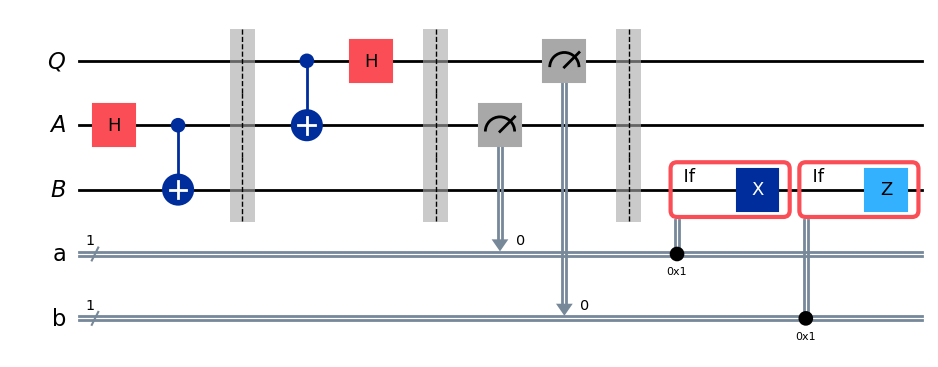

In [250]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier() # Make a visual seperation for readability and prevents potentially wronge optimization

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw("mpl"))

In [260]:
# Generate random unitary qubit gate
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[ 0.3065398 +0.j        ,  0.9496037 +0.06546877j],
       [ 0.65125122+0.69419392j, -0.19385816-0.23745666j]])

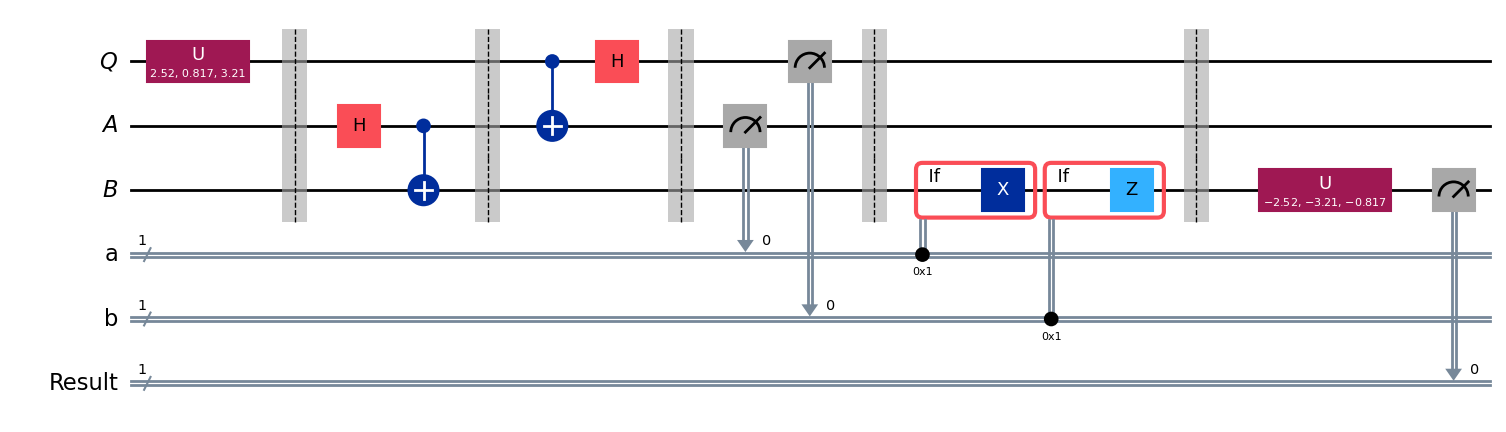

In [264]:
# Create a new testing circuit that uses our above protocol
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1) # Getting rid of this makes results mostly start with one

result = ClassicalRegister(1, "Result") # if it worked the outcome should always start with 0
test.add_register(result)
test.measure(ebit1, result)

display(test.draw("mpl"))

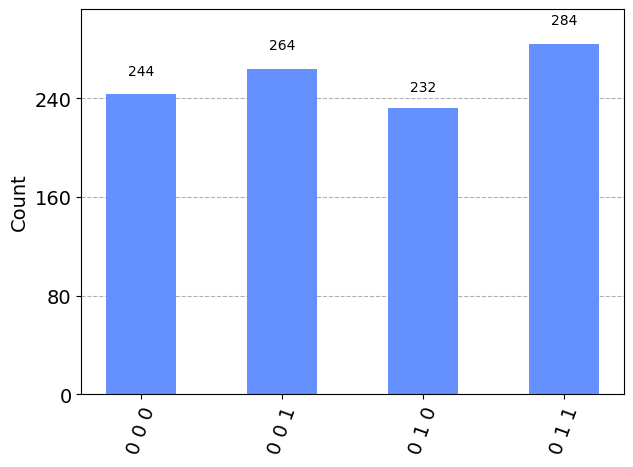

In [265]:
# Run Aer Simulator and Plot results
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))


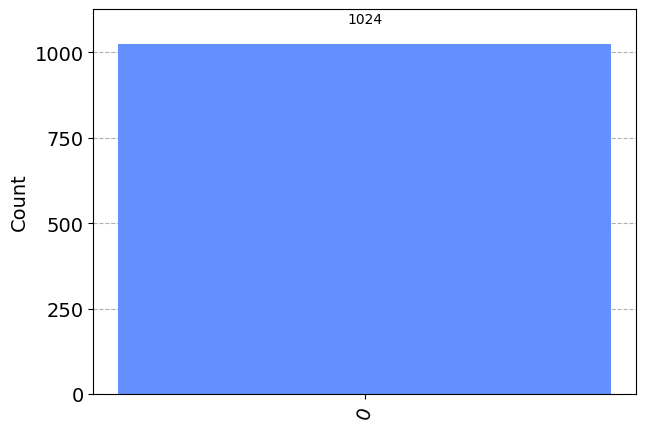

{'0': 1024}

In [257]:
# Filter on just the desired bit
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))
